In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# TODO: add wind speed, direction, and friction
def gen_start_end(theta, psi, wind_speed, wind_dir, friction):
    if type(theta) == np.float:
        if theta < 1.0:
            psis = 0.0
        else:
            psis = psi
    else:
        ind = np.where(theta < 1.0)
        psis = np.ones_like(theta) * psi
        psis[ind] = 0.0
    
    wind_offset_x = wind_speed * np.cos(wind_dir)
    wind_offset_y = wind_speed * np.sin(wind_dir)
    
    # if friction is 0, push rad 1, if it's 1, push rad 0.5, nonlinear relationship in between
    push_rad = np.exp(-friction)
    
    start_x, start_y = -np.cos(theta), -np.sin(theta)
    end_x = push_rad*np.cos(theta) + np.cos(theta + psis) + wind_offset_x
    end_y = push_rad*np.sin(theta) + np.sin(theta + psis) + wind_offset_y
    return start_x, start_y, end_x, end_y


In [3]:
theta = 1.1 #np.pi
psi = 0.0 # np.pi / 2
wind_speed = 0.0
wind_dir = 0.0 #-np.pi
friction = 0.0
start_x, start_y, end_x, end_y = gen_start_end(theta, psi, wind_speed, wind_dir, friction)

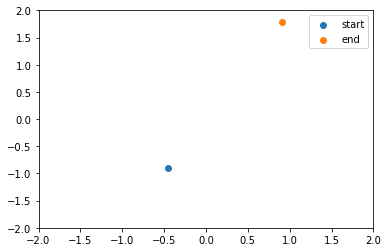

In [4]:
plt.scatter(start_x, start_y, label='start')
plt.scatter(end_x, end_y, label='end')
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.legend()

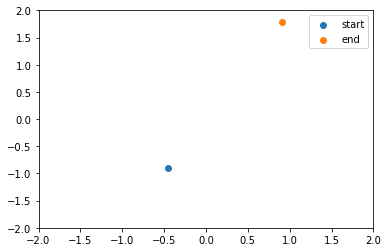

In [5]:
plt.scatter(start_x, start_y, label='start')
plt.scatter(end_x, end_y, label='end')
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.legend()

In [6]:
n_act = 100
n_episodes = 100
psis = np.random.uniform(-np.pi / 2, np.pi / 2, n_episodes)
wind_speeds = np.random.exponential(0.1, size=n_episodes)
wind_dirs = np.random.uniform(0.0, np.pi * 2, n_episodes)
frictions = np.random.uniform(0.0, 1.0, n_episodes)

# offsets = np.zeros((n_episodes, n_act, 2))
offsets = np.random.uniform(low=-1,high=1,size=(n_episodes, n_act, 2))
X_all = np.zeros((n_episodes, n_act, 2))
Y_all = np.zeros((n_episodes, n_act, 2))
thetas_all = np.zeros((n_episodes, n_act))

for i, (psi, wind_speed, wind_dir, friction) in enumerate(zip(psis, wind_speeds, wind_dirs, frictions)):
    thetas_all[i] = np.random.uniform(0, 2 * np.pi, n_act)
#     start_x, start_y, end_x, end_y = gen_start_end(thetas_all[i], psi, wind_speeds, wind_dirs, frictions)
    start_x, start_y, end_x, end_y = gen_start_end(thetas_all[i], psi, wind_speed, wind_dir, friction)


    X_all[i] = np.stack([start_x, start_y], axis=1) + offsets[i]
    Y_all[i] = np.stack([end_x, end_y], axis=1) + offsets[i]


3.8394345130618186
2.675844937919218
5.376068811658382
3.896282982437218
3.0336751210101545


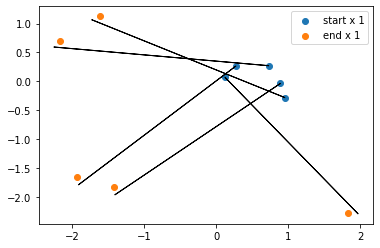

In [7]:
idx = 5
up_to_idx = 5
scale = 3.0
plt.scatter(X_all[idx, :up_to_idx, 0], X_all[idx, :up_to_idx, 1], label='start x 1')
plt.scatter(Y_all[idx, :up_to_idx, 0], Y_all[idx, :up_to_idx, 1], label='end x 1')
for i in range(up_to_idx):
    vx, vy = np.cos(thetas_all[idx, i]), np.sin(thetas_all[idx, i])
    plt.arrow(X_all[idx, i, 0], X_all[idx, i, 1], vx*scale, vy*scale)
    print(thetas_all[idx, i])
# plt.scatter(Y_all[2, :, 0], Y_all[2, :, 1], label='end x 2')
plt.legend()


3.8394345130618186
2.675844937919218
5.376068811658382
3.896282982437218
3.0336751210101545


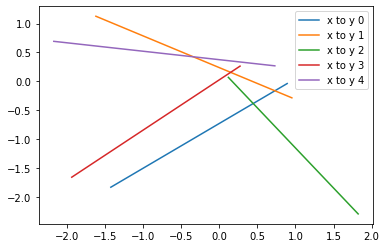

In [8]:
for i in range(up_to_idx):
    plt.plot([X_all[idx, i, 0], Y_all[idx, i, 0]], [X_all[idx, i, 1], Y_all[idx, i, 1]], label='x to y {}'.format(i))
    print(thetas_all[idx, i])
plt.legend()


In [9]:
data = dict(X=X_all, Y=Y_all, thetas=thetas_all, psi=psis,
            wind_speed=wind_speeds, wind_dir=wind_dirs, friction=frictions,
           keys=['wind_speed', 'wind_dir', 'psi', 'friction'])
with open('/data/varyingsim/datasets/toy_4_test.pickle', 'wb') as f:
# with open('/data/varyingsim/datasets/toy_4.pickle', 'wb') as f:
    pickle.dump(data, f)

In [10]:
psis[1]

-0.04648027549972289

In [11]:
episode_idx = 0
run_idx = 0
x, theta, psi = X_all[episode_idx][run_idx], thetas_all[episode_idx][run_idx], psis[episode_idx]

In [12]:
x, theta

(array([0.02102077, 0.77325479]), 4.964894117158615)

In [13]:
data['X'].shape

(100, 100, 2)